#Stock Price Forecast

Name : Prasanna Venkatesh D

Reg No : 24MCS1051

Time Series using LSTM

Stock price prediction using RNN Varient

##**Recurrent Neural Networks**

In a recurrent neural network we store the output activations from one or more of the layers of the network. Often these are hidden later activations. Then, the next time we feed an input example to the network, we include the previously-stored outputs as additional inputs. You can think of the additional inputs as being concatenated to the end of the “normal” inputs to the previous layer. For example, if a hidden layer had 10 regular input nodes and 128 hidden nodes in the layer, then it would actually have 138 total inputs (assuming you are feeding the layer’s outputs into itself à la Elman) rather than into another layer). Of course, the very first time you try to compute the output of the network you’ll need to fill in those extra 128 inputs with 0s or something.

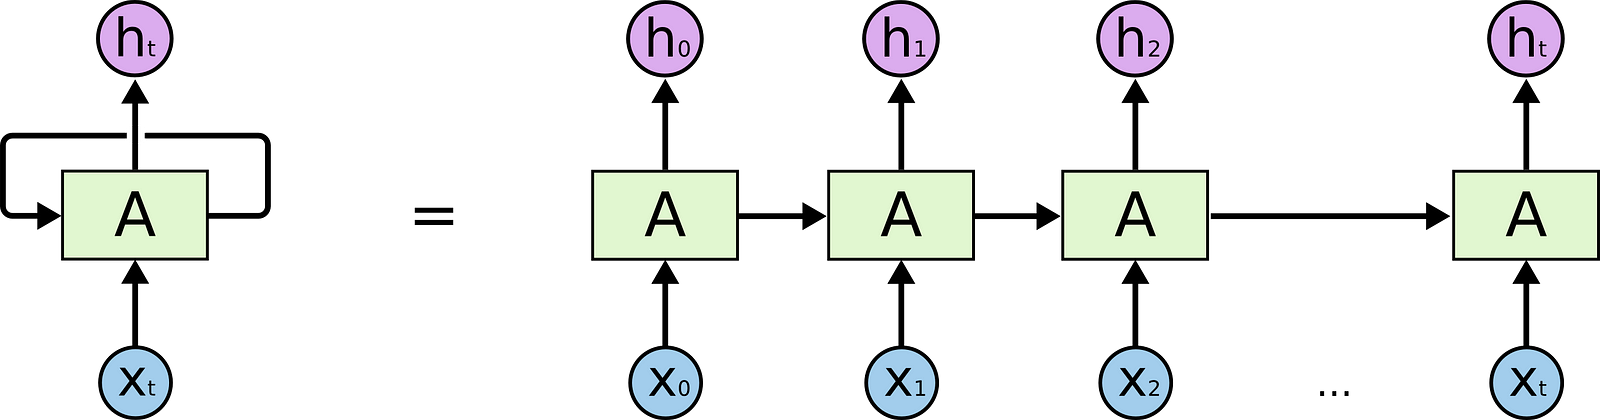

Now, even though RNNs are quite powerful, they suffer from Vanishing gradient problem which hinders them from using long term information, like they are good for storing memory 3-4 instances of past iterations but larger number of instances don't provide good results so we don't just use regular RNNs. Instead, we use a better variation of RNNs: Long Short Term Networks(LSTM).

##Vanishing Gradient problem

Vanishing gradient problem is a difficulty found in training artificial neural networks with gradient-based learning methods and backpropagation. In such methods, each of the neural network's weights receives an update proportional to the partial derivative of the error function with respect to the current weight in each iteration of training. The problem is that in some cases, the gradient will be vanishingly small, effectively preventing the weight from changing its value. In the worst case, this may completely stop the neural network from further training. As one example of the problem cause, traditional activation functions such as the hyperbolic tangent function have gradients in the range (0, 1), and backpropagation computes gradients by the chain rule. This has the effect of multiplying n of these small numbers to compute gradients of the "front" layers in an n-layer network, meaning that the gradient (error signal) decreases exponentially with n while the front layers train very slowly.

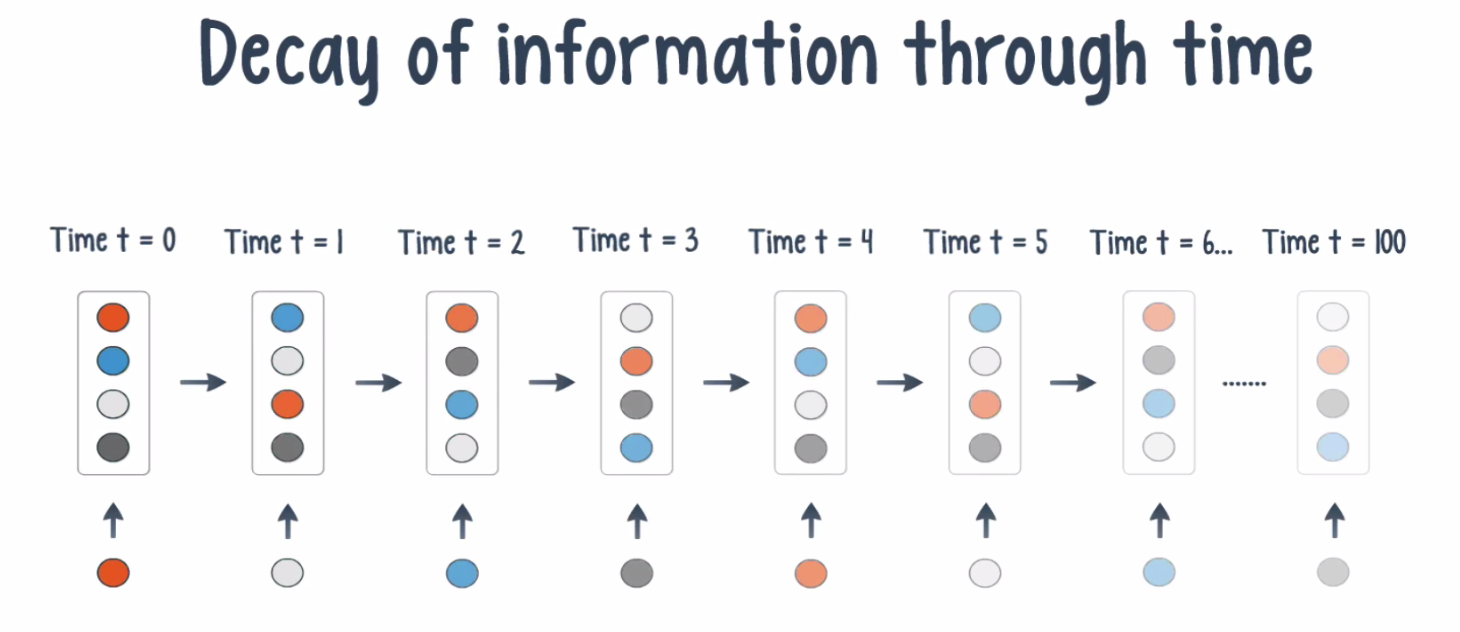

#**Long Short Term Memory(LSTM)**

Long short-term memory (LSTM) units (or blocks) are a building unit for layers of a recurrent neural network (RNN). A RNN composed of LSTM units is often called an LSTM network. A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell is responsible for "remembering" values over arbitrary time intervals; hence the word "memory" in LSTM. Each of the three gates can be thought of as a "conventional" artificial neuron, as in a multi-layer (or feedforward) neural network: that is, they compute an activation (using an activation function) of a weighted sum. Intuitively, they can be thought as regulators of the flow of values that goes through the connections of the LSTM; hence the denotation "gate". There are connections between these gates and the cell.The expression long short-term refers to the fact that LSTM is a model for the short-term memory which can last for a long period of time. An LSTM is well-suited to classify, process and predict time series given time lags of unknown size and duration between important events. LSTMs were developed to deal with the exploding and vanishing gradient problem when training traditional RNNs.

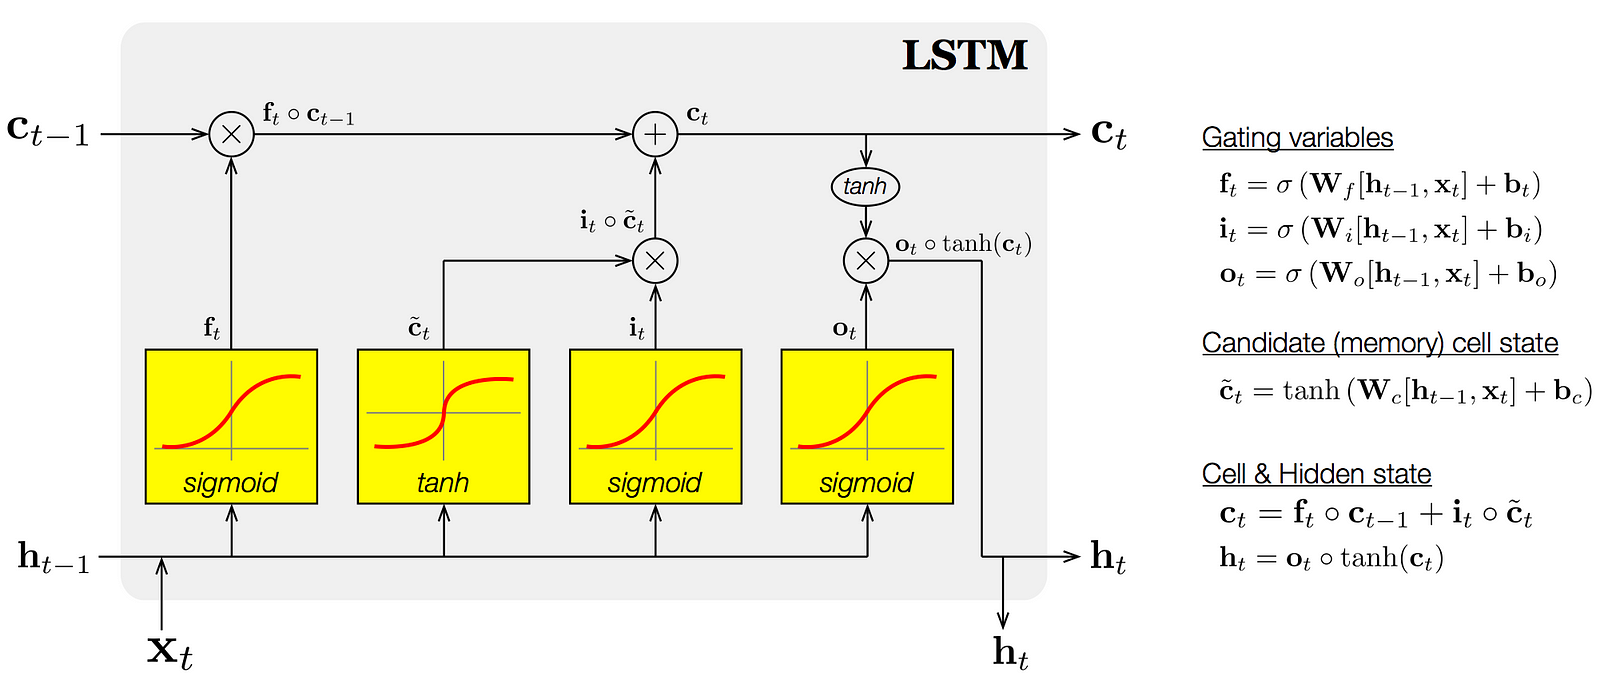


#**CODE**

**Downloading the stock Data**

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

In [ ]:
import pandas_datareader as pdr
import os

In [ ]:
import datetime
import yfinance as yf

In [ ]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2018, 1, 1)
start_date_str = str(start.date())
end_date_str = str(end.date())

In [ ]:
stocks = ['IBM', 'GOOGL', 'AMZN']

In [ ]:
if not os.path.exists('data'):
    os.makedirs('data')

In [ ]:
for ticker in stocks:
    file_name = 'data/' + ticker + '_' + start_date_str + '_to_' + end_date_str + '.csv'
    print(file_name)
    data = yf.download(ticker, start=start, end=end)
    print(data.shape)
    data.to_csv(file_name)

[*********************100%***********************]  1 of 1 completed

data/IBM_2006-01-01_to_2018-01-01.csv
(3020, 5)
data/GOOGL_2006-01-01_to_2018-01-01.csv



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

(3020, 5)
data/AMZN_2006-01-01_to_2018-01-01.csv
(3020, 5)


Using LSTM,Predicting the stock price

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [ ]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [ ]:
# Get the data
dataset = pd.read_csv('/content/data/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [ ]:
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

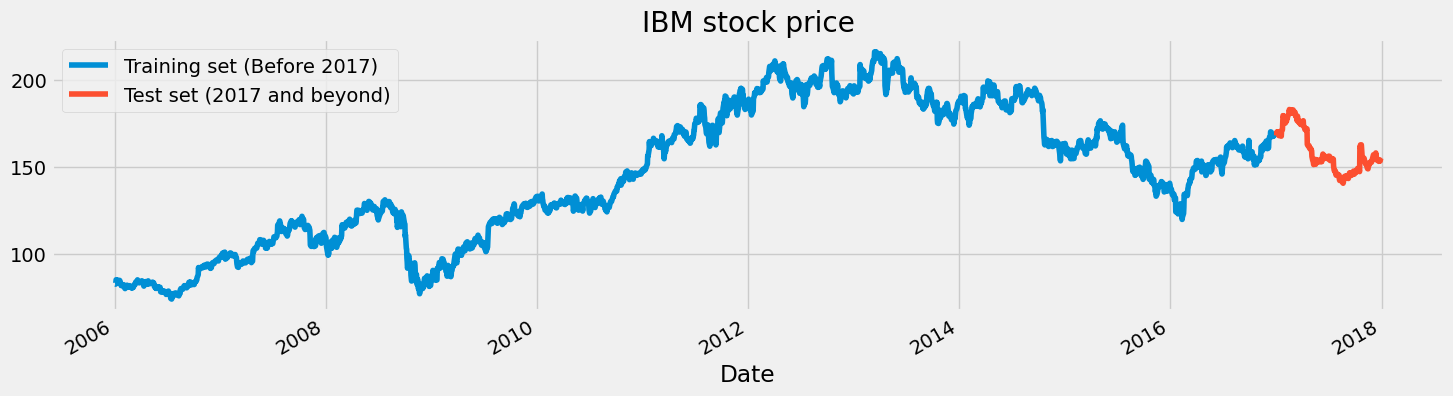

In [ ]:
# We have chosen 'High' attribute for prices
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [ ]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [ ]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0467
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0126
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0082
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0076
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0072
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0058
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0059
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0050
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0045
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0037
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0039
Epoch 12/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0040
Epoch 13/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0038
Epoch 14/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0034
Epoch 15/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0032
Epoc

In [ ]:
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


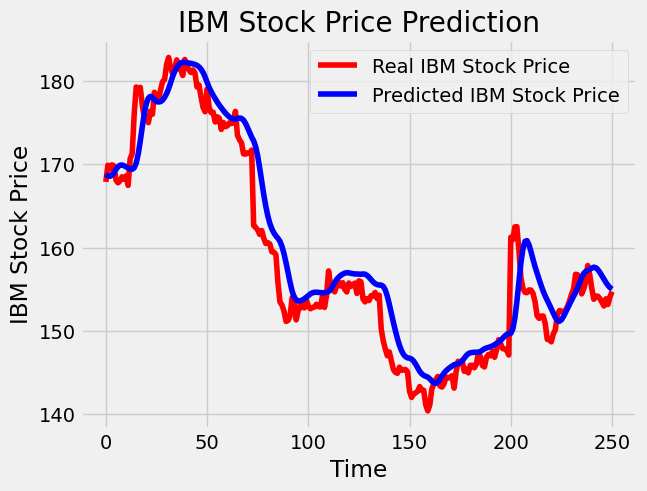

In [ ]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

In [ ]:
# Evaluating our model
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 3.3181139886993516.


#**Gated Recurrent Units**

The GRU unit does not have to use a memory unit to control the flow of information like the LSTM unit. It can directly makes use of the all hidden states without any control. GRUs have fewer parameters and thus may train a bit faster or need less data to generalize. But, with large data, the LSTMs with higher expressiveness may lead to better results.They are almost similar to LSTMs except that they have two gates: reset gate and update gate. Reset gate determines how to combine new input to previous memory and update gate determines how much of the previous state to keep. Update gate in GRU is what input gate and forget gate were in LSTM. We don't have the second non linearity in GRU before calculating the outpu, .neither they have the output gate.

In [ ]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1956
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0531
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0212
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0055
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0045
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0040
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0039
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0038
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0038
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0034
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0033
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0031
Epoch 13/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0032
Epoch 14/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0031
Epoch 15/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0033
Epoch 16/50
19/

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


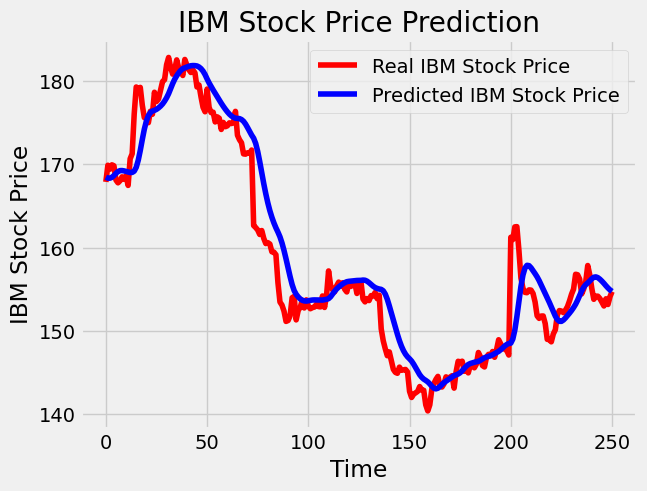

In [ ]:
# Visualizing the results for GRU
plot_predictions(test_set,GRU_predicted_stock_price)

In [ ]:
# Evaluating GRU
return_rmse(test_set,GRU_predicted_stock_price)

The root mean squared error is 3.4079362059280625.


# Bidirectional LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Bidirectional

# Define the LSTM model
regressor = Sequential()

# First Bidirectional LSTM layer with Dropout
regressor.add(Bidirectional(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1))))
regressor.add(Dropout(0.3))

# Second LSTM layer
regressor.add(LSTM(units=64, return_sequences=True))
regressor.add(Dropout(0.3))

# Third LSTM layer
regressor.add(LSTM(units=64, return_sequences=False))
regressor.add(Dropout(0.3))

# Output layer
regressor.add(Dense(units=1))

# Compiling the model
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
regressor.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0452
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0048
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0049
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0035
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0039
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0037
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0033
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0036
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0032
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0032
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0028
Epoch 12/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0027
Epoch 13/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0027
Epoch 14/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0027
Epoch 15/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0022
Epoch 16/50
85/

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


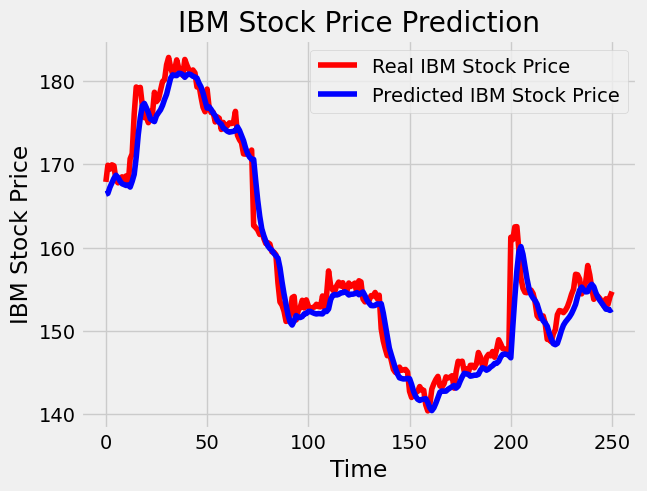

In [ ]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

In [ ]:
# Evaluating our model
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 2.270928295561333.


#CNN-LSTM Hybrid Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Conv1D, MaxPooling1D, Flatten

# Define the model
regressor = Sequential()

# 1D Convolutional layer for feature extraction
regressor.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
regressor.add(MaxPooling1D(pool_size=2))

# First LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.3))

# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(0.3))

# Fully connected dense layer
regressor.add(Dense(units=32, activation='relu'))
regressor.add(Dropout(0.3))

# Output layer
regressor.add(Dense(units=1))

# Compile the model
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
regressor.fit(X_train, y_train, epochs=50, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.1137
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0231
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0154
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0134
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0117
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0109
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0106
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0086
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0089
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0083
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0081
Epoch 12/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0072
Epoch 13/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0064
Epoch 14/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0064
Epoch 15/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0058
Epoch 16/50
85/

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


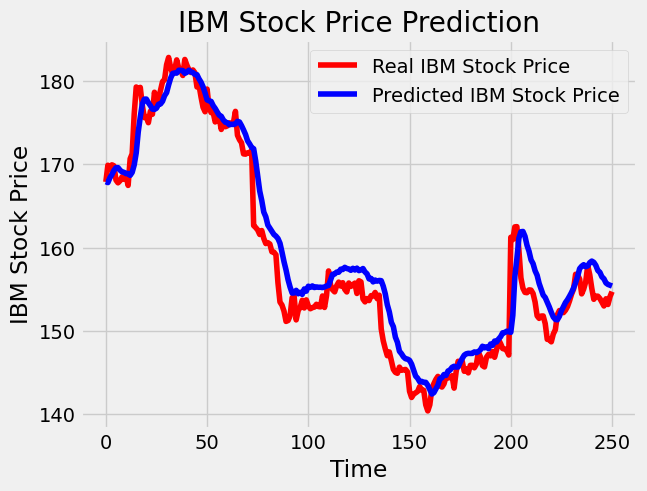

In [ ]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

In [ ]:
# Evaluating our model
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 2.9141736589021634.


#Stacked LSTM with Attention Mechanism


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Attention, Permute, Multiply, Lambda, RepeatVector
import tensorflow.keras.backend as K

attention_layer = Dense(1, activation='tanh')

# Define attention layer
def attention_block(inputs):
    attention = attention_layer(inputs)
    attention = Permute((2, 1))(attention)
    attention = Lambda(lambda x: K.softmax(x, axis=-1))(attention)
    attention = Permute((2, 1))(attention)
    output = Multiply()([inputs, attention])
    return output

# Define the model
regressor = Sequential()

# First LSTM layer
regressor.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.3))

# Second LSTM layer
regressor.add(LSTM(units=64, return_sequences=True))
regressor.add(Dropout(0.3))

# Apply attention mechanism
regressor.add(Lambda(attention_block))

# Third LSTM layer
regressor.add(LSTM(units=64, return_sequences=False))
regressor.add(Dropout(0.3))

# Fully connected layer
regressor.add(Dense(units=32, activation='relu'))
regressor.add(Dropout(0.3))

# Output layer
regressor.add(Dense(units=1))

# Compile the model
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
regressor.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.1502
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0201
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0162
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0138
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0121
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0110
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0106
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0105
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0092
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0080
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0088
Epoch 12/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0079
Epoch 13/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0074
Epoch 14/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0065
Epoch 15/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0071
Epoc

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


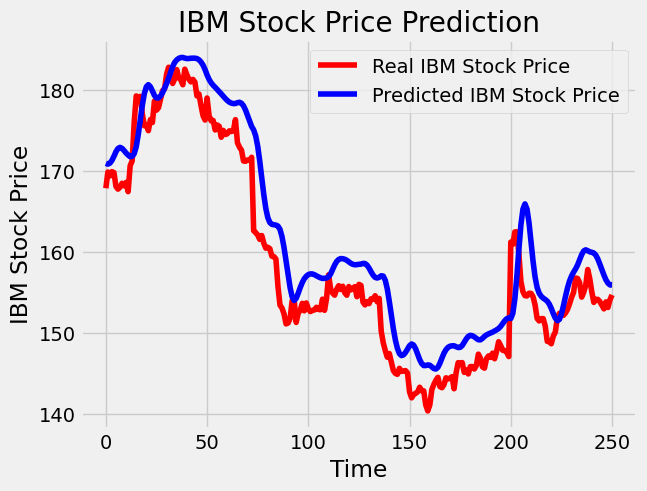

In [ ]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

In [ ]:
# Evaluating our model
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 4.481096026635262.


#LSTM + GRU Hybrid Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dropout, Dense

# Define the model
regressor = Sequential()

# First LSTM layer
regressor.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.3))

# Second GRU layer (faster than LSTM)
regressor.add(GRU(units=64, return_sequences=True))
regressor.add(Dropout(0.3))

# Third LSTM layer
regressor.add(LSTM(units=64, return_sequences=False))
regressor.add(Dropout(0.3))

# Fully connected dense layer
regressor.add(Dense(units=32, activation='relu'))
regressor.add(Dropout(0.3))

# Output layer
regressor.add(Dense(units=1))

# Compile the model
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
regressor.fit(X_train, y_train, epochs=50, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0900
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0201
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0152
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0148
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0121
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0114
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0102
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0096
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0086
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0080
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0081
Epoch 12/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0074
Epoch 13/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0072
Epoch 14/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0062
Epoch 15/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0061
Epoc

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


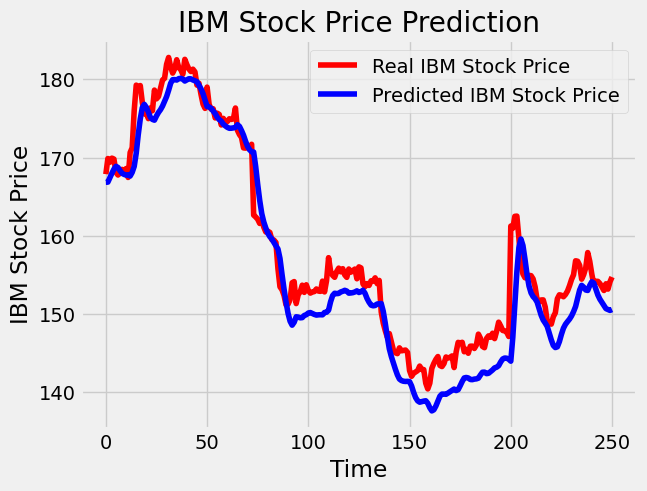

In [ ]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

In [ ]:
# Evaluating our model
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 3.531869504283822.


#Root Mean Squares error



LSTM - 3.318

GRU - 3.407

Bidirectional LSTM - 2.270

CNN - LSTM Hybrid Model - 2.914

Stacked LSTM with Attention Mechanism - 4.481

LSTM + GRU Hybrid Model - 3.531

Analysis

Bidirectional LSTM achieved the lowest error rate of 2.270, making it the best-performing model in this evaluation. The bidirectional nature of this model allows it to capture dependencies in both forward and backward directions, enhancing its learning capability.

CNN - LSTM Hybrid Model also performed well with an error rate of 2.914. The combination of CNN and LSTM benefits from the feature extraction power of CNN and the sequential processing strength of LSTM.

LSTM and GRU models showed comparable performance, with error rates of 3.318 and 3.407, respectively. This indicates that both architectures are effective but do not outperform the hybrid or bidirectional variants.

LSTM + GRU Hybrid Model had an error rate of 3.531, slightly worse than standalone LSTM and GRU models. This suggests that combining these architectures does not necessarily guarantee better performance.

Stacked LSTM with Attention Mechanism had the highest error rate (4.481), indicating that while attention mechanisms are generally beneficial, the particular configuration used here might not have been optimal.

The evaluation highlights that Bidirectional LSTM is the most effective model for this task, followed by the CNN-LSTM Hybrid Model. Standard LSTM and GRU models perform reasonably well, while the LSTM-GRU Hybrid Model and Stacked LSTM with Attention Mechanism require further optimization to achieve better